In [ ]:
# Import Bladder + Normal for detection model training
import pandas as pd
from sklearn.utils import shuffle

df = pd.read_csv("Dataset/bladder+normal.csv")
df = shuffle(df, random_state=42).reset_index(drop=True)
display(df.head(5))
display(df.shape)

,cancer_type,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,normal,normal,10.154073,6.229753,4.726761,7.694610,3.036633,7.709174,4.876000,5.498816,...,12.301864,11.774613,13.769954,13.445276,8.039906,7.075380,7.236685,3.213733,3.253917,3.309950
1,bladder,tumoral_urothelia,5.448550,2.855473,3.956391,6.990753,2.515888,4.532908,5.148095,3.420617,...,12.355006,12.073772,13.375017,13.129036,14.285014,12.222636,13.764253,2.635243,3.087296,2.749863
2,normal,normal,11.113545,5.940342,5.564016,8.278557,3.737454,8.904443,6.310405,5.029888,...,12.440360,11.836593,13.794074,13.652361,10.184499,5.065497,7.553789,3.308568,3.670986,3.624235
3,bladder,tumoral_urothelia,6.117643,2.963498,4.462724,7.637291,2.748184,4.799081,5.387159,3.796579,...,13.488239,13.297656,14.433989,14.138876,8.479708,3.234453,3.255350,2.217603,2.700261,2.564158
4,bladder,tumoral_urothelia,6.341556,2.839390,4.035876,6.989258,2.344312,5.291725,5.210843,3.260132,...,12.746157,12.766855,14.151366,13.834423,8.481049,3.886499,3.866914,2.422337,2.591235,2.733775


(86, 54677)

In [2]:
# Preprocessing data
# Input df, return X,y for training
from sklearn.utils import shuffle

def preprocessing(df):
    
    # Drop type Columns
    if "type" in df.columns:
        df = df.drop(columns="type")

    # Convert label to binary type:
    if 'cancer_type' in df.columns and not df['cancer_type'].isin([0, 1]).all():
        df['cancer_type'] = df['cancer_type'].map({'bladder': 1, 'normal': 0})
    
    # Get X,y
    target = 'cancer_type'
    X = df.drop(columns=target)
    y = df[target]
    
    return X,y

# Display proccesed data

X,y = preprocessing(df)
display(X,y)

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,10.154073,6.229753,4.726761,7.694610,3.036633,7.709174,4.876000,5.498816,7.182190,3.183595,...,12.301864,11.774613,13.769954,13.445276,8.039906,7.075380,7.236685,3.213733,3.253917,3.309950
1,5.448550,2.855473,3.956391,6.990753,2.515888,4.532908,5.148095,3.420617,3.378807,3.022539,...,12.355006,12.073772,13.375017,13.129036,14.285014,12.222636,13.764253,2.635243,3.087296,2.749863
2,11.113545,5.940342,5.564016,8.278557,3.737454,8.904443,6.310405,5.029888,6.557580,3.570486,...,12.440360,11.836593,13.794074,13.652361,10.184499,5.065497,7.553789,3.308568,3.670986,3.624235
3,6.117643,2.963498,4.462724,7.637291,2.748184,4.799081,5.387159,3.796579,2.914434,2.863601,...,13.488239,13.297656,14.433989,14.138876,8.479708,3.234453,3.255350,2.217603,2.700261,2.564158
4,6.341556,2.839390,4.035876,6.989258,2.344312,5.291725,5.210843,3.260132,4.015626,2.747104,...,12.746157,12.766855,14.151366,13.834423,8.481049,3.886499,3.866914,2.422337,2.591235,2.733775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,5.877810,2.981233,4.215136,7.057191,3.241641,4.873606,5.360925,3.586231,2.815725,2.888503,...,12.849960,12.797338,14.239379,13.820882,9.966319,4.201960,7.081000,2.342733,2.739011,2.685265
82,9.175141,6.997110,8.655219,7.637841,3.333808,8.305916,4.716150,4.623700,10.296539,3.551861,...,12.803370,12.260684,13.924746,13.542926,9.461209,7.386210,8.320564,3.277732,3.597326,3.219145
83,9.775815,5.804580,4.975438,10.190593,2.673737,7.160313,5.601028,4.508930,5.299688,4.462494,...,12.813202,12.134137,13.953880,13.851152,9.954725,7.662682,8.721134,2.616275,2.854682,2.903801
84,6.253289,2.976346,4.285171,7.196972,2.646898,4.677947,5.756575,3.184499,2.633751,2.912722,...,12.881227,12.819549,14.203416,13.831713,10.343228,4.501393,7.557837,2.324029,2.526199,2.722077


0     0
1     1
2     0
3     1
4     1
     ..
81    1
82    0
83    0
84    1
85    0
Name: cancer_type, Length: 86, dtype: int64

In [3]:
# Method 1: Variance Threshold (Assume Features with higher variance => better)
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

threshold = 0.001
selector = VarianceThreshold(threshold=threshold)
X_var = selector.fit_transform(X)

selected_feature_indices = selector.get_support(indices=True)
X_var = X.columns[selected_feature_indices]
print(f"Number of selected features: {len(X_var)}")
print(f"Selected features: {X_var}")

Number of selected features: 54675
Selected features: Index(['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at',
       '1316_at', '1320_at', '1405_i_at', '1431_at',
       ...
       'AFFX-r2-Ec-bioD-3_at', 'AFFX-r2-Ec-bioD-5_at', 'AFFX-r2-P1-cre-3_at',
       'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at', 'AFFX-ThrX-5_at',
       'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at', 'AFFX-TrpnX-5_at',
       'AFFX-TrpnX-M_at'],
      dtype='object', length=54675)


#### Because the dataset is already normalized, the variance is not so different => All gene is selected with vaiance threshold method => This method is not apporpriate

In [4]:
# Method 2: Unvariate feature selection method (Based on their relation with output)
# ANOVA f-statistics

from sklearn.feature_selection import SelectKBest, f_classif

# Select top 1000 features based on ANOVA F-statistic
k_best_selector = SelectKBest(score_func=f_classif, k=500)
X_anova = k_best_selector.fit_transform(X, y)

# Get selected feature names
X_anova = X.columns[k_best_selector.get_support()]

print(f"Selected features: {X_anova}")

Selected features: Index(['1553103_at', '1553587_a_at', '1554510_s_at', '1554600_s_at',
       '1555226_s_at', '1555764_s_at', '1555780_a_at', '1556285_s_at',
       '1861_at', '200051_at',
       ...
       '35685_at', '37943_at', '44669_at', '45288_at', '45828_at',
       '48031_r_at', '49679_s_at', '52164_at', '52940_at', '55583_at'],
      dtype='object', length=500)


In [5]:
# Method 3: Mutual Information methnod (Non-linear relationship between predictors and targets)

from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select top 100 features based on Mutual Information
mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k=500)
X_mut = mutual_info_selector.fit_transform(X, y) 

# Get selected feature names
X_mut = X.columns[mutual_info_selector.get_support()]

print(f"Selected features: {X_mut}")


Selected features: Index(['225258_at', '225260_s_at', '225261_x_at', '225264_at', '225270_at',
       '225272_at', '225277_at', '225298_at', '225307_at', '225312_at',
       ...
       '58994_at', '59625_at', '59631_at', '59705_at', '61734_at',
       '64408_s_at', '64474_g_at', '64488_at', '65718_at', '79005_at'],
      dtype='object', length=500)


In [6]:
# unique_anova_features = set(X_anova).difference(set(X_mut))
# unique_anova_data = X[list(unique_anova_features)]
# X = unique_anova_data
# display(X,y)

overlap_features = X_anova.intersection(X_mut)  # Features in both ANOVA and Mutual Information
overlap_data = X[list(overlap_features)]  # Subset of data with overlapping features

# Step 4: Update X to Use Overlapping Features
X = overlap_data

# Display the resulting feature set and target
display(X.head(), y)

,225261_x_at,225298_at,225307_at,225324_at,225419_at,225425_s_at,225430_at,225743_at,225772_s_at,225797_at,...,33760_at,35156_at,35685_at,45288_at,45828_at,48031_r_at,49679_s_at,52164_at,52940_at,55583_at
0,8.217890,8.375826,7.567756,9.095024,8.450207,8.421294,7.543694,6.907558,8.627619,8.854424,...,6.493177,8.165379,8.558321,7.324370,8.613619,6.756506,7.155876,7.937842,8.246378,6.436169
1,3.848685,4.957842,4.256128,4.041988,3.253402,4.554378,4.214074,3.424446,4.025241,4.372156,...,3.030319,5.945266,5.300246,2.819815,4.036512,3.114105,4.588591,3.039431,3.835758,3.261716
2,8.341676,9.541089,7.688461,8.621222,9.130452,9.633154,8.433925,6.762981,8.925191,7.912312,...,7.624959,8.393103,9.479167,8.734992,9.617791,6.878333,8.015068,9.303107,9.653213,7.839725
3,2.941233,5.372545,3.614757,3.884997,3.359284,3.141461,4.372841,3.830143,3.941902,3.636022,...,3.090935,5.390167,5.271925,2.606152,4.196061,2.989832,4.678842,2.957187,3.404200,3.664270
4,4.011363,5.848331,4.710481,4.199222,3.344754,5.212916,4.631304,4.262734,4.860350,4.724420,...,3.046447,6.434421,5.491535,2.690550,4.318183,3.102797,4.531581,3.049721,4.618389,3.702253


0     0
1     1
2     0
3     1
4     1
     ..
81    1
82    0
83    0
84    1
85    0
Name: cancer_type, Length: 86, dtype: int64

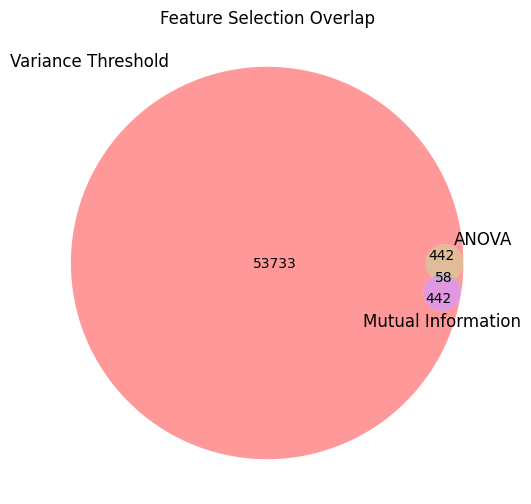

In [7]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3  

# Convert numpy arrays to flattened lists for compatibility
variance_features = set(X_var.ravel())
anova_features = set(X_anova.ravel())
mutual_info_features = set(X_mut.ravel())

# Create a Venn diagram to visualize the overlap
plt.figure(figsize=(8, 6))
venn_diagram = venn3(
    subsets=(
        len(variance_features - anova_features - mutual_info_features),  # Only Variance
        len(anova_features - variance_features - mutual_info_features),  # Only ANOVA
        len(variance_features & anova_features - mutual_info_features),  # Variance & ANOVA
        len(mutual_info_features - variance_features - anova_features),  # Only Mutual Info
        len(variance_features & mutual_info_features - anova_features),  # Variance & Mutual Info
        len(anova_features & mutual_info_features - variance_features),  # ANOVA & Mutual Info
        len(variance_features & anova_features & mutual_info_features),  # All 3 Methods
    ),
    set_labels=("Variance Threshold", "ANOVA", "Mutual Information"),
)
plt.title("Feature Selection Overlap")
plt.show()


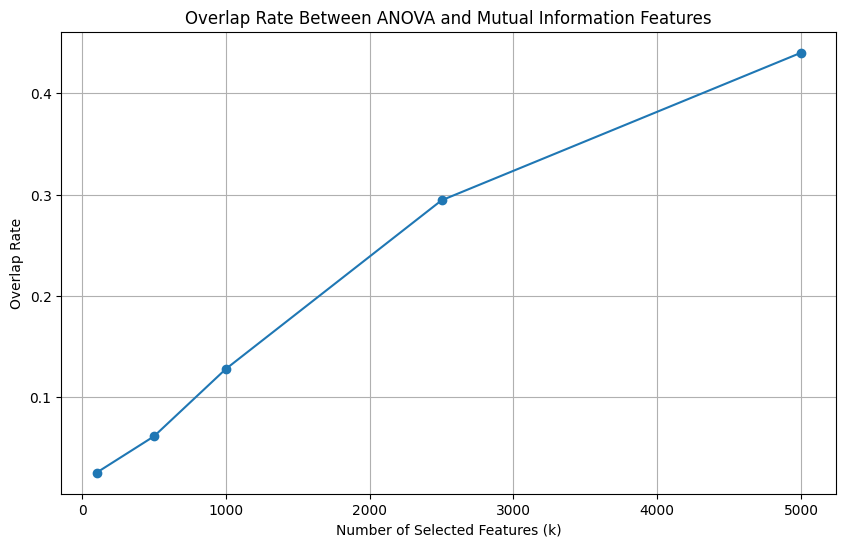

In [22]:
def compare_overlap_rates(X, y, k_values, variance_features):
    """
    Compare and visualize the overlap rates between ANOVA and Mutual Information feature selection.

    Parameters:
    - X: DataFrame of input features.
    - y: Target variable.
    - k_values: List of k values to test.
    - variance_features: Set of features selected by Variance Threshold.

    Returns:
    - None (displays a plot).
    """
    overlap_rates = []

    for k in k_values:
        # Select features using ANOVA
        anova_selector = SelectKBest(score_func=f_classif, k=k)
        anova_features = set(X.columns[anova_selector.fit(X, y).get_support()])

        # Select features using Mutual Information
        mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k=k)
        mutual_info_features = set(X.columns[mutual_info_selector.fit(X, y).get_support()])

        # Calculate overlap rate (intersection / union)
        overlap = len(anova_features & mutual_info_features)
        union = len(anova_features | mutual_info_features)
        overlap_rate = overlap / union if union > 0 else 0

        overlap_rates.append(overlap_rate)

    # Plot overlap rates
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, overlap_rates, marker="o", linestyle="-")
    plt.title("Overlap Rate Between ANOVA and Mutual Information Features")
    plt.xlabel("Number of Selected Features (k)")
    plt.ylabel("Overlap Rate")
    plt.grid(True)
    plt.show()

# Example usage:
k_values = [100, 500, 1000, 2500, 5000]  # Varying number of features to select
variance_features = set(X.columns)  # Variance Threshold includes all features here
compare_overlap_rates(X, y, k_values, variance_features)


In [8]:
# Logistic Regression with l1, saga solver, and ANOVA features selection method
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
import numpy as np

# Step 1: ANOVA for Feature Ranking
k = 100  # Number of features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_anova_selected = selector.fit_transform(X, y)

# Get the indices of the top-k features selected bay ANOVA
anova_selected_indices = selector.get_support(indices=True)

# Step 2: Logistic Regression with L1 Regularization
l1_model = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, random_state=42)
l1_model.fit(X_anova_selected, y)

# Extract non-zero coefficients from the Logistic Regression model
l1_selected_indices_within_anova = np.where(l1_model.coef_[0] != 0)[0]

# Map L1-selected features back to original feature indices
selected_features_l1_anova = anova_selected_indices[l1_selected_indices_within_anova]

# Print the selected feature indices
print("Original feature indices selected by ANOVA + L1:", selected_features_l1_anova)
import pandas as pd

# Assuming X is a pandas DataFrame
feature_names = X.columns  # Get the column names from the dataset

# Map indices to feature names
selected_feature_names = feature_names[selected_features_l1_anova]

# Print the selected feature names
print("Feature names selected by ANOVA + L1 Regularization:")
print(selected_feature_names)



Original feature indices selected by ANOVA + L1: [  2  42  44  59  62  75  86  88 108 115 142 145 149 151 162 164 178 193
 195 199 201 203 207 235 243 257 291 303 338 342 359 372 373 386 389 392
 393 413 431]
Feature names selected by ANOVA + L1 Regularization:
Index(['201505_at', '208756_at', '221531_at', '212077_at', '225063_at',
       '202592_at', '211651_s_at', '209511_at', '218831_s_at', '201145_at',
       '216032_s_at', '202839_s_at', '203259_s_at', '200789_at', '208646_at',
       '200052_s_at', '221512_at', '218391_at', '218216_x_at', '200758_s_at',
       '201459_at', '203131_at', '201403_s_at', '201744_s_at', '202350_s_at',
       '1554510_s_at', '201824_at', '203114_at', '219819_s_at', '219162_s_at',
       '204211_x_at', '221437_s_at', '200820_at', '200974_at', '223112_s_at',
       '210830_s_at', '224057_s_at', '202867_s_at', '224823_at'],
      dtype='object')


c:\Study\CS_539\Cancer_Detector\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [10]:
# Logistic Regression with l1, liblinear solver, and ANOVA features selection method

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
import numpy as np

# Step 1: ANOVA for Feature Ranking
k = 100  # Number of features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_anova_selected = selector.fit_transform(X, y)

# Get the indices of the top-k features selected by ANOVA
anova_selected_indices = selector.get_support(indices=True)

# Step 2: Logistic Regression with L1 Regularization
l1_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
l1_model.fit(X_anova_selected, y)

# Extract non-zero coefficients from the Logistic Regression model
l1_selected_indices_within_anova = np.where(l1_model.coef_[0] != 0)[0]

# Map L1-selected features back to original feature indices
selected_features_l1_anova = anova_selected_indices[l1_selected_indices_within_anova]

# Print the selected feature indices
print("Original feature indices selected by ANOVA + L1:", selected_features_l1_anova)
import pandas as pd

# Assuming X is a pandas DataFrame
feature_names = X.columns  # Get the column names from the dataset

# Map indices to feature names
selected_feature_names = feature_names[selected_features_l1_anova]

# Print the selected feature names
print("Feature names selected by ANOVA + L1 Regularization:")
print(selected_feature_names)



Original feature indices selected by ANOVA + L1: [ 59  75 115 193 203 235 392]
Feature names selected by ANOVA + L1 Regularization:
Index(['212077_at', '202592_at', '201145_at', '218391_at', '203131_at',
       '201744_s_at', '210830_s_at'],
      dtype='object')


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, classification_report
import numpy as np

# Define a pipeline without StandardScaler
pipeline = Pipeline([
    ('classifier', LogisticRegression(penalty='l1', solver='saga', max_iter=5000, random_state=42))
])

# Define Stratified K-Fold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store results
accuracy_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Perform K-Fold Cross-Validation
fold = 1
for train_index, test_index in skf.split(X, y):
    # Split the data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    # Append scores
    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    
    # Print classification report for each fold (optional)
    print(f"\nFold {fold} - Classification Report:")
    print(classification_report(y_test, y_pred))
    
    fold += 1

# Print average metrics across folds
print("\nCross-Validation Results:")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.2f} ± {np.std(accuracy_scores):.2f}")
print(f"Mean Recall: {np.mean(recall_scores):.2f} ± {np.std(recall_scores):.2f}")
print(f"Mean F1 Score: {np.mean(f1_scores):.2f} ± {np.std(f1_scores):.2f}")
print(f"Mean ROC-AUC: {np.mean(roc_auc_scores):.2f} ± {np.std(roc_auc_scores):.2f}")



Fold 1 - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18


Fold 2 - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         8

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17


Fold 3 - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         8

    accuracy                           1.00        17
   macro avg       1.00      

In [24]:
import pandas as pd
test_bladder = pd.read_csv("Dataset/bladder_test.csv")

# Get X,y
target = 'cancer_type'
X_test = test_bladder.drop(columns=target)
X_test_aligned = X_test[X.columns]  # Ensure the columns match the training features
y_test = test_bladder[target]
display(y_test)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    1
24    0
25    0
26    0
27    0
28    0
29    0
30    1
31    0
32    0
33    0
34    1
35    1
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    1
56    0
Name: cancer_type, dtype: int64

In [21]:
import pandas as pd

# Assuming y_test, y_pred, and y_pred_prob are already defined and available
# y_test: True labels for the test set
# y_pred: Predicted labels for the test set
# y_pred_prob: Predicted probabilities for the "Bladder" class

# Create the report DataFrame
report_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred,
    'Probability (Bladder)': y_pred_prob
})

# Display the report DataFrame
display(report_df.head())

# Save the report to a CSV file
report_df.to_csv("test_set_prediction_report.csv", index=False)

print("The test set prediction report has been saved as 'test_set_prediction_report.csv'.")


ValueError: array length 17 does not match index length 57

In [10]:
# Predict using the final trained model
y_pred = pipeline.predict(X_test_aligned)
y_pred_prob = pipeline.predict_proba(X_test_aligned)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print results
print("\nFinal Model Evaluation on Test Dataset:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Final Model Evaluation on Test Dataset:
Accuracy: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         9

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



In [11]:
import pandas as pd
import numpy as np

# Predict probabilities for the test dataset
y_pred = pipeline.predict(X_test_aligned)  # Predicted class (0 or 1)
y_pred_prob = pipeline.predict_proba(X_test_aligned)[:, 1]  # Probability for class 1

# Extract coefficients and feature names
coefficients = pipeline.named_steps['classifier'].coef_[0]
feature_names = X.columns

# For each sample predicted as bladder cancer (class 1)
for i, (pred, prob) in enumerate(zip(y_pred, y_pred_prob)):
    if pred == 1:  # Only consider predictions for class 1 (bladder cancer)
        sample_features = X_test_aligned.iloc[i, :]  # Feature values for the sample
        contributions = sample_features.values * coefficients  # Calculate feature contributions
        
        # Create a DataFrame for contributions
        contribution_df = pd.DataFrame({
            'Feature': feature_names,
            'Contribution': contributions
        }).sort_values(by='Contribution', ascending=False)  # Sort by contribution
        
        # Print details for the sample
        print(f"\nSample {i}: Predicted Probability (Bladder): {prob:.4f}")
        print("Top Contributing Genes:")
        print(contribution_df.head(10))  # Display top 10 genes for this sample



Sample 1: Predicted Probability (Bladder): 0.9915
Top Contributing Genes:
        Feature  Contribution
49     35156_at      5.124501
1     225298_at      3.920887
50     35685_at      1.891513
54   49679_s_at      1.211482
33  228089_x_at      0.290848
6     225430_at      0.247273
0   225261_x_at      0.000000
2     225307_at      0.000000
4     225419_at      0.000000
3     225324_at      0.000000

Sample 4: Predicted Probability (Bladder): 0.9533
Top Contributing Genes:
        Feature  Contribution
49     35156_at      4.495903
1     225298_at      3.692089
50     35685_at      1.976549
54   49679_s_at      1.131672
33  228089_x_at      0.293966
6     225430_at      0.281263
0   225261_x_at      0.000000
2     225307_at      0.000000
4     225419_at      0.000000
3     225324_at      0.000000

Sample 5: Predicted Probability (Bladder): 0.9719
Top Contributing Genes:
        Feature  Contribution
49     35156_at      4.511655
1     225298_at      3.370132
50     35685_at      1.81